In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
mydata = np.loadtxt("C:/git_number/number_recognizer/data_text.txt")
mytarget = np.loadtxt("C:/git_number/number_recognizer/new_number.txt")
mydata15 = np.loadtxt("C:/git_number/number_recognizer/data_text15.txt")
mytarget15 = np.loadtxt("C:/git_number/number_recognizer/new_number15.txt")

In [15]:
'''def make_model():
    from sklearn.neighbors import KNeighborsClassifier   
    clf = KNeighborsClassifier(n_neighbors=1)
    return clf

classifier = make_model()'''

'def make_model():\n    from sklearn.neighbors import KNeighborsClassifier   \n    clf = KNeighborsClassifier(n_neighbors=1)\n    return clf\n\nclassifier = make_model()'

In [16]:
#classifier.fit(mydata, mytarget)

gamma: 0.000800,precision: 0.733503719613

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[0.15786256991003603, 0.62057593667349698, 0.6670038260112986, 0.67528240722957322, 0.70023017751131955, 0.71333067183348475, 0.72164537448927712, 0.72286510862446907, 0.73350371961332794, 0.73343315134366649, 0.72988801936551639, 0.72277756283429573, 0.72632196183433551, 0.7239547664006416, 0.72743374895528068, 0.71909840646460721, 0.71796446644521827, 0.71439176757988476, 0.70849442740337454, 0.70145451558814464, 0.69547209072027072, 0.68738918482571609, 0.67318276463130622, 0.65897147833078473, 0.63649439911299122, 0.6164874930381774, 0.59041857103804474, 0

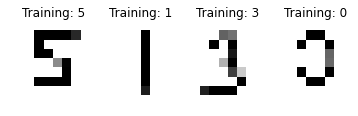

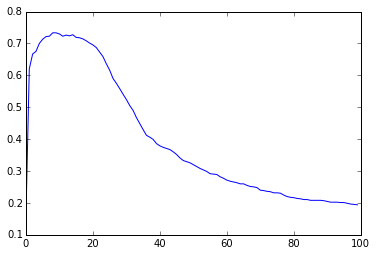

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.0099, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [21]:
from sklearn import cross_validation
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier,GradientBoostingClassifier


#digits = datasets.load_digits()
#images_and_labels = list(zip(digits.images, digits.target))
images_and_labels = list(zip(mydata15, mytarget15))

for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    image=np.reshape(image,(8,8))
    
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(mydata15)
#n_samples = len(digits.images)

data = mydata15.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
pre=[]
glist=[]
for g in range(100):
    cl = svm.SVC(gamma= g / 10000. )
    #cl= KNeighborsClassifier(n_neighbors=1)
    #cl = RandomForestClassifier(n_estimators=10)
    #cl = ExtraTreesClassifier(n_estimators=10)
    #cl = AdaBoostClassifier(n_estimators=100)
    #cl = GradientBoostingClassifier(n_estimators=100)
    x=mydata15
    y=mytarget15
    precision=np.mean(cross_val_score(cl,x,y,cv=StratifiedKFold(y,5)))
    pre.append(precision)
    glist.append(g)
    #print("gamma: %f,precision: %s\n" % (g / 10000.,classifier))
    

print("gamma: %f,precision: %s\n" % (np.argmax(np.array(pre))/ 10000.,np.max(np.array(pre))))
x1=glist
y1=pre
print(x1)
print(y1)
plt.figure()
plt.plot(x1,y1)
plt.show()

cl.fit(mydata15,mytarget15)


In [18]:
np.argmax(np.array(pre))

8

In [19]:
from sklearn.externals import joblib

joblib.dump(cl, "./machine_0323.pkl")

['./machine_0323.pkl',
 './machine_0323.pkl_01.npy',
 './machine_0323.pkl_02.npy',
 './machine_0323.pkl_03.npy',
 './machine_0323.pkl_04.npy',
 './machine_0323.pkl_05.npy',
 './machine_0323.pkl_06.npy',
 './machine_0323.pkl_07.npy',
 './machine_0323.pkl_08.npy',
 './machine_0323.pkl_09.npy',
 './machine_0323.pkl_10.npy',
 './machine_0323.pkl_11.npy']